In [15]:
%matplotlib inline

In [2]:
#The math library is for basic math functions (square root, exponents, etc).
import math
#The matplotlib.pyplot is used for generating various plots (line graphs, histograms, etc).
import matplotlib.pyplot as plt
#The numpy library is used for generating a random values from a normal distribution.
import numpy as np
#The pandas.datareader library has datasets of various financial databases.
from pandas_datareader import data

# 1. LOADING INFO FROM YAHOO

In [4]:
def get_company_info (ticket, starting_period, ending_period = None, source = 'yahoo'):
    return data.DataReader(ticket, source, starting_period, ending_period)

In [5]:
company_data = get_company_info('AIR.PA','1/1/1990','1/1/2019')

In [6]:
company_data_real = get_company_info('AIR.PA','1/1/2019','1/5/2019')

Now, let's calculate compound annual growth rate(CAGR).

What CAGR can tell you:


The compound annual growth rate isn't a true return rate, but rather a representational figure. It is essentially a number that describes the rate at which an investment would have grown if it had grown the same rate every year and the profits were reinvested at the end of each year. In reality, this sort of performance is unlikely. However, CAGR can be used to smooth returns so that they may be more easily understood when compared to alternative investments.

To calculate the CAGR of an investment:
<ol>
    <li>Divide the value of an investment at the end of the period by its value at the beginning of that period.</li>
    <li>Raise the result to an exponent of one divided by the number of years.</li>
    <li>Subtract one from the subsequent result.</li>
    </ol>
Something like that :
$$CAGR = (\frac{V_{final}}{V_{begin}})^{\frac{1}{t}} -1 $$

Now, let's determine the annual volatility of returns. As most people in finance understand it, volatility is standard deviation of returns.

Now, in order to make this figure useful as an annual measure, it has to be scaled by an annualization factor. This factor is most often the square root of the number of trading days in a year which happens to be 252.

In [7]:
def calc_statistical_variables(company_data, number_of_trading_days = 252):
    
    time_elapsed = (company_data.index[-1] - company_data.index[0]).days
    
    price_ratio = (company_data['Adj Close'][-1] / company_data['Adj Close'][1])
    inverse_number_of_years = 1 / (time_elapsed / 365.0)
    cagr = price_ratio ** inverse_number_of_years - 1
    
    vol = company_data['Adj Close'].pct_change().std()
    vol = vol * math.sqrt(number_of_trading_days)
    
    return vol,cagr

In [9]:
vol, cagr = calc_statistical_variables(company_data)

In [10]:
print ("cagr (mean returns) : ", str(round(cagr,4)))
print ("vol (standard deviation of return ) :", str(round(vol,4)))

cagr (mean returns) :  0.1085
vol (standard deviation of return ) : 0.368


# 2.GENERATING RANDOM VARIABLES

Perfect! This is all we need to model a standard deviation of stock prices. Now, let's actually create a random sample using these parameters. For this, we'll use the normal function from the numpy library.

In [11]:
def make_random_walk(company_data, cagr, vol, number_of_trading_days=252):
    daily_return_percentages = np.random.normal((1+cagr)**(1/number_of_trading_days), vol/math.sqrt(number_of_trading_days),number_of_trading_days)
    price_series = [company_data['Adj Close'][-1]]

    for drp in daily_return_percentages:
        price_series.append(price_series[-1] * drp)
    plt.plot(price_series)
    plt.xlabel("days")
    plt.ylabel("price")
    plt.show()
    return price_series

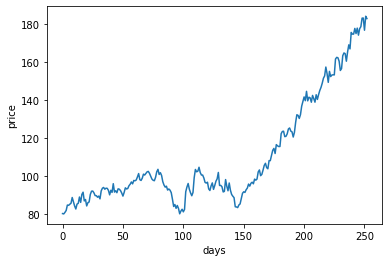

In [12]:
random_walk = make_random_walk(company_data, cagr, vol)

# 3. MANY TRIALS LATER ...

In [13]:
def make_many_random_walks(company_data, cagr, vol, number_of_trading_days=252, number_of_trials = 10000):
    ending_price_points = []
    for i in range(number_of_trials):
        daily_return_percentages = np.random.normal((1+cagr)**(1/number_of_trading_days), vol/math.sqrt(number_of_trading_days),number_of_trading_days)
        price_series = [company_data['Adj Close'][-1]]

        for drp in daily_return_percentages:
            price_series.append(price_series[-1] * drp)
        plt.plot(price_series)
        ending_price_points.append(price_series[-1])
    plt.ylabel("Closing price")
    plt.xlabel("Count days")
    plt.show()
    return price_series,ending_price_points

In [14]:
number_of_trading_days = 252
daily_return_percentages = np.random.normal((1+cagr)**(1/number_of_trading_days), vol/math.sqrt(number_of_trading_days),number_of_trading_days)
len(daily_return_percentages)

252

In [16]:
number_of_trading_days = 252
daily_return_percentages = np.random.normal((1+cagr)**(1/number_of_trading_days), vol/math.sqrt(number_of_trading_days),number_of_trading_days)
daily_return_percentages

array([0.96731217, 1.0102082 , 0.99987493, 1.00645102, 1.00408224,
       1.00593424, 1.00452667, 0.98219638, 0.98766688, 1.01690453,
       0.98913728, 1.05772203, 0.98653123, 1.02129002, 0.99373832,
       0.98867308, 1.00717998, 0.95928214, 0.98764553, 1.00277496,
       0.98996448, 0.99799299, 1.01553552, 1.03623258, 0.97798779,
       1.03020039, 1.01730249, 0.96672698, 1.01073331, 0.99603863,
       1.02695693, 0.99469765, 1.0161884 , 1.02566452, 1.0303857 ,
       1.01693366, 1.01963431, 1.01486   , 1.06116354, 0.95699918,
       1.01664591, 0.99284539, 0.96209662, 0.95622009, 0.94108419,
       0.99833451, 1.04598435, 1.02030817, 1.00996071, 0.99269077,
       1.03117141, 1.02432889, 1.03862955, 0.98641187, 0.99241487,
       0.97831927, 1.03339796, 1.01107936, 1.01683508, 0.97658537,
       1.02233257, 1.03228829, 0.97284843, 0.93812803, 1.01194564,
       1.00344871, 0.99525816, 1.0481731 , 1.04652676, 1.02505822,
       1.00459253, 0.9905449 , 1.00736722, 0.9865361 , 0.99757

In [15]:
price_series = [company_data['Adj Close'][-1]]
price_series

[80.16822814941406]

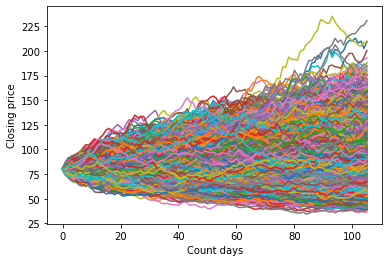

In [165]:
random_walk_for_set_period, trials_of_random_walk = make_many_random_walks(company_data, cagr, vol, 21*5,10000)

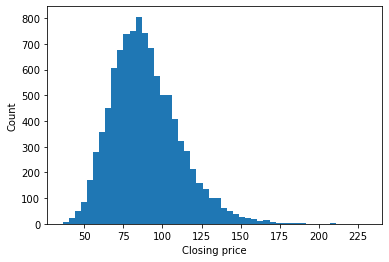

In [166]:
plt.hist(trials_of_random_walk,bins=50)
plt.xlabel("Closing price")
plt.ylabel("Count")
plt.show()

# 4.COLLECT RESULT AND ANALYZE

In [167]:
expected_ending_price_point = round(np.mean(trials_of_random_walk),2)
print("Expected Ending Price Point : ", str(expected_ending_price_point))

Expected Ending Price Point :  89.26


In [168]:
population_mean = (cagr+1) * company_data['Adj Close'][-1]
print ("Sample Mean : ", str(expected_ending_price_point))
print ("Population Mean: ", str(round(population_mean,2)));
print ("Percent Difference : ", str(round((population_mean - expected_ending_price_point)/population_mean * 100,2)), "%")

Sample Mean :  89.26
Population Mean:  88.86
Percent Difference :  -0.45 %


In [169]:
top_ten = np.percentile(trials_of_random_walk,100-10)
bottom_ten = np.percentile(trials_of_random_walk,10);
mean = np.percentile(trials_of_random_walk, 50);
print ("Top 10% : ", str(round(top_ten,2)))
print ("Bottom 10% : ", str(round(bottom_ten,2)))
print ("Mean: ", str(round(mean,2)))

Top 10% :  117.48
Bottom 10% :  63.68
Mean:  86.75


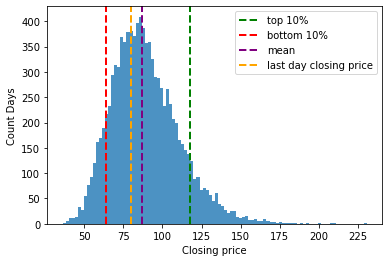

In [170]:
plt.hist(trials_of_random_walk, bins=100, alpha =0.8)
plt.xlabel("Closing price")
plt.ylabel("Count Days")
plt.axvline(top_ten,color='g', label="top 10%",linestyle='dashed',linewidth=2)
plt.axvline(bottom_ten,color='r', label="bottom 10%",linestyle='dashed',linewidth=2)
plt.axvline(mean,color='purple', label="mean",linestyle='dashed',linewidth=2)
plt.axvline(company_data['Adj Close'][-1],color='orange', label="last day closing price", linestyle='dashed',linewidth=2)
plt.legend()
plt.show()

In [171]:
mean_forecast_prices = np.percentile(trials_of_random_walk, 50);
mean_forecast_prices

86.74820723164817

In [172]:
mean_real_prices = np.percentile(company_data_real["Adj Close"] , 50)
mean_real_prices

80.3687515258789

In [173]:
print ("Percent Difference : ", str(round((mean_forecast_prices - mean_real_prices)/mean_forecast_prices * 100,2)), "%")

Percent Difference :  7.35 %
